<a href="https://colab.research.google.com/github/bysischpok/Lab1/blob/main/%D0%9B%D0%B0%D0%B15_%D0%9D%D0%B5%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данной практие (и еще на парочке занятий потом) мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные. </li>
<li> Рассмотреть проблему сильного дисбаланса классов. </li>
<li> Использовать алгоритмы кластеризации </li>
<li> Использовать алгоритмы понижения размерности </li>


## Описание данных и постановка задачи:
**Задача:** Банкам, выпускающим кредитные карты, очень важно распознавать мошеннические операции с кредитными картами, чтобы с клиентов не взималась плата за товары, которые они не покупали.

**Данные**: Набор данных содержит транзакции, совершенные по кредитным картам в сентябре 2013 года европейскими держателями карт.
В этом наборе данных представлены транзакции, проведенные за два дня, где мы имеем 492 случаев мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, положительный класс (мошенники) составляет всего 0,172% от всех транзакций.

Датасет содержит только числовые входные переменные, которые являются результатом преобразования PCA (метод главных компонент).

Из-за вопросов конфиденциальности невозможно использовать исходные признаки и более подробную информацию о них. Характеристики V1, V2, ... V28 - это главные компоненты, полученные с помощью PCA, единственные характеристики, которые не были преобразованы с помощью PCA - это "Time" и "Amount". Столбец "Time" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Столбец "Amount" - это сумма транзакции. Столбец "Class" является переменной отклика и принимает значение 1 в случае мошенничества и 0 в противном случае.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Подключимся к диску для загрузки данных.

Загружаем данные:
'creditcard.csv'

In [24]:
# загрузка данных и структура данных
df=pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Небольшой описательный анализ.

In [25]:
# анализ данных
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Проверим на наличие пропусков в данных.

In [26]:
# проверка наличия пропусков в данных
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


Пропусков нет?

Выведем названия столбцов.

In [27]:
# названия столбцов
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Еще раз оценим отношение классов целевой переменной.

In [ ]:
# вывод на печать 'Обычные транзакции составляют' и 'Мошеннические транзакции составляют' в процентном соотношении

In [ ]:
# df['Class'].value_counts()  - возвращает словарик,
# где ключ - уникальные значения в столбце Class кол-во значений
# value - сколько всего записей имело эти значения


# так как это словарь, то чтобы получить значения, обращаемся по ключу:


In [28]:
#  вывод отношения классов целевой переменной, но записанный через f строку

n_trans = df['Class'].value_counts()[0]/df.shape[0]*100.0
f_trans = df['Class'].value_counts()[1]/df.shape[0]*100.0

print(f'Обычные транзакции составляют  {n_trans} % данных')
print(f'Мошеннические транзакции составляют  {f_trans} % данных')

Обычные транзакции составляют  99.82725143693798 % данных
Мошеннические транзакции составляют  0.1727485630620034 % данных


**Важно!**

Обратите внимание, насколько несбалансированным является наш исходный набор данных! Большинство транзакций не являются мошенническими. Если мы используем этот массив данных в качестве основы для наших моделей прогнозирования и анализа, мы можем получить много ошибок, поскольку наши алгоритмы будут предполагать, что все транзакции не являются мошенничеством. Нам же критически важно сконцентрироваться именно на мошенниках.

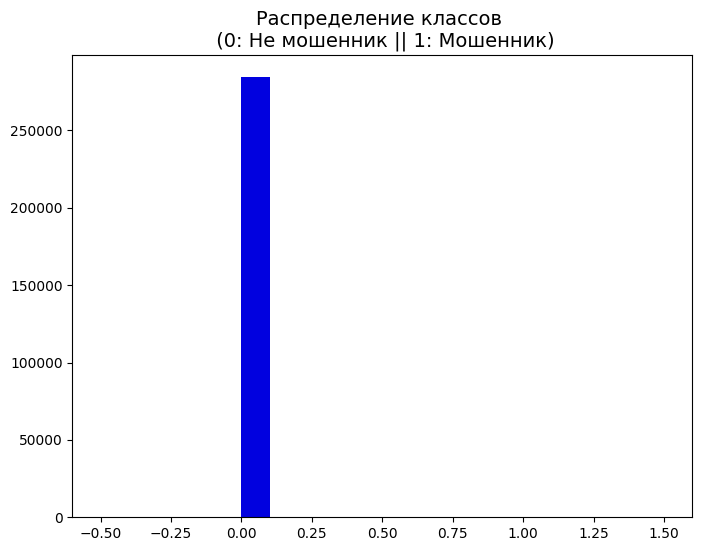

In [29]:
colors = ["#0101DF", "#DF0101"]
 # строим гистограмму целевой переменной:
plt.figure(figsize=(8, 6))
# Гистограмма для класса 0
plt.hist(df[df['Class'] == 0]['Class'], color=colors[0])
# Гистограмма для класса 1
plt.hist(df[df['Class'] == 1]['Class'], color=colors[1])
plt.title('Распределение классов \n (0: Не мошенник || 1: Мошенник)', fontsize=14)
plt.show()

Количество мошенников настолько мало, что даже не виден их столбец на гистограмме

Построим распределения по суммам и времени транзакций.

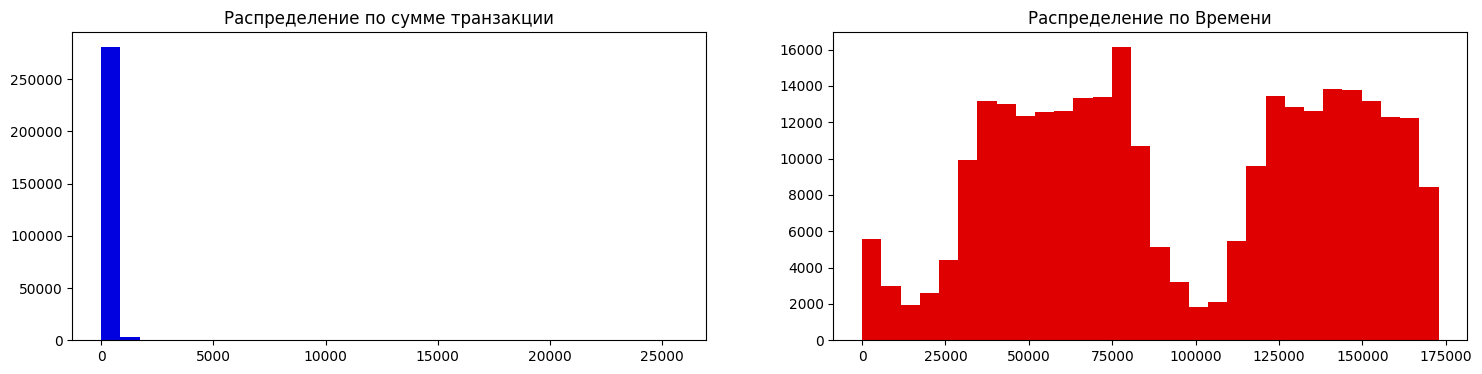

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount']
time_val = df['Time']

ax[0].hist(amount_val,bins=30,color=colors[0])
ax[0].set_title("Распределение по сумме транзакции")
ax[1].hist(time_val,bins=30,color=colors[1])
ax[1].set_title("Распределение по Времени")

plt.show()

### Масштабирование
Первым делом нам необходимо отмасштабировать столбцы **Time** и **Amount**. Поскольку все остальные признаки уже отмасштабированы. Однако делать это нужно только строго **после** разбиения на обучающую выборку и тестовую.

Затем необходимо создать подвыборку из наших данных, чтобы иметь равное количество случаев мошенничества и не мошенничества, что поможет нашим моделям лучше понять закономерности, определяющие, является ли транзакция мошенничеством или нет.

### Зачем создавать подвыборку?
Наши данные имеют сильный дисбаланс. Использование исходного датасета приведет к следующим проблемам:
  - **Переобучение**: Наши модели классификации будут предполагать, что в большинстве случаев мошенничества не существует! Мы хотим, чтобы наша модель точно определяла, когда происходит мошенничество.
  - **Неверные корреляции:** Хотя мы не знаем, что обозначают признаки "V", будет полезно понять, как каждый из этих признаков влияет на результат (мошенничество или отсутствие мошенничества), поскольку, имея несбалансированный набор данных, мы не можем увидеть истинные корреляции между целевой переменной и признаками.

### Разделение данных
**Важно!**

Прежде, чем приступить к балансировке наших данных, мы должны разделить исходный набор данных. Зачем?

Для определения качества работы наших моделей их необходимо тестировать на **исходном** тестовом наборе, а не на тестовом наборе, созданном после балансировки. Цель балансировки заключается в том, чтобы модель смогла найти закономерности для принятия решения по типу транзакции, поэтому мы выравниваем соотношение между мошенническими транзакциями и обычными. Однако проверять качество мы будем именно в "боевых" условиях с учетом реального распределения данных.




In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# Инициализация RobustScaler
rob_scaler = RobustScaler()
# Разделение данных на признаки и целевую переменную
X = df.drop('Class', axis=1)
y = df['Class']
# Разделение на обучающую и тестовую выборки
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)
# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print(f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print(f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print(f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print(f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print(f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')
# Масштабирование столбца 'Amount'
original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1, 1))
original_Xtest['scaled_amount'] = rob_scaler.transform(original_Xtest['Amount'].values.reshape(-1, 1))
# Масштабирование столбца 'Time'
original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1, 1))
original_Xtest['scaled_time'] = rob_scaler.transform(original_Xtest['Time'].values.reshape(-1, 1))
# Удаляем оригинальные столбцы 'Time' и 'Amount'
original_Xtrain.drop(['Time', 'Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time', 'Amount'], axis=1, inplace=True)
# Преобразуем DataFrame в numpy массивы
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
# Проверяем распределение классов
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label / len(original_ytrain))
print("Тестовый набор:", test_counts_label / len(original_ytest))

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


## Метод Random Under-Sampling

Применим метод *Random Under-Sampling*, который случайным образом удаляет объекты доминирующего класса и выравнивает соотношение классов.

#### Алгоритм:
<ul>
<li>Определяем степень несбалансированности (посчитали количество меток одного и другого класса выше)  </li>
<li>Как только мы определим, сколько случаев считаются мошенническими операциями (Fraud = "1"), мы должны довести количество немошеннических операций до того же количества, что и мошеннических (мы хотим получить соотношение 50/50 между классами), то есть это в подвыборке будет 492 случая мошенничества и 492 случая немошеннических операций.  </li>
<li> После применения этого метода мы получим подвыборку нашего набора данных с соотношением 50/50 в отношении наших классов. Наконец, не забудем <b>перемешать</b> наши данные для того, чтобы модели не зависили от порядка входных данных.</li>
</ul>

**Важно!**

Основная проблема данного метода заключается в том, что мы рискуем тем, что наши модели классификации не будут работать так точно, как нам хотелось бы, поскольку происходит большая потеря информации (выделение всего 492 немошеннических транзакций из 284 315 немошеннических транзакций).

In [105]:
# Поскольку наши классы сильно не сбалансированы, мы должны сделать их эквивалентными,
# чтобы получить нормальное распределение классов.

# Перемешаем данные перед созданием подвыборок

df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # берем последние 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154197,100910.0,-0.173502,0.193208,1.770552,-0.711462,-0.210865,0.959073,-0.757437,-0.496339,1.767115,...,0.545391,-0.763044,-0.470279,-1.148858,1.285908,0.732841,-0.001367,0.113967,39.00,0
151807,96291.0,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,-2.856359,...,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741,33.59,1
154731,102764.0,-8.903945,7.702008,-6.491394,-2.184919,-2.386015,-1.776494,-1.613846,3.389268,4.466637,...,-0.341961,0.102841,0.506301,0.574925,1.209978,0.137990,2.130589,1.551871,8.78,0
238466,149676.0,1.833191,0.745333,-1.133009,3.893556,0.858164,0.910235,-0.498200,0.344703,-0.667939,...,0.039289,0.181652,0.072981,-0.155299,-0.149891,0.012792,0.040854,0.022903,17.39,1
9252,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00,1


In [95]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,87767.365854,-2.343109,1.830897,-3.490142,2.280937,-1.602129,-0.681877,-2.813856,0.282345,-1.302100,...,0.354636,0.050204,-0.035315,-0.032425,0.029059,0.042491,0.082159,0.035781,102.297429,0.500000
std,48482.548729,5.521597,3.629562,6.233098,3.227436,4.217674,1.754424,5.852838,4.884980,2.298577,...,2.789578,1.169229,1.156738,0.559860,0.662467,0.477223,1.002775,0.409034,230.194896,0.500254
min,376.000000,-30.552380,-11.028858,-31.103685,-3.784621,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.228357,-7.263482,-1.869290,0.000000,0.000000
25%,44940.000000,-2.732232,-0.138793,-5.084967,-0.017054,-1.807007,-1.540258,-3.105154,-0.204765,-2.313050,...,-0.134613,-0.517478,-0.248106,-0.372474,-0.319964,-0.266132,-0.071834,-0.061330,1.630000,0.000000
50%,80727.500000,-0.735451,0.943078,-1.356585,1.302368,-0.435546,-0.640554,-0.669595,0.147397,-0.717872,...,0.175028,0.096521,-0.047389,0.024873,0.049293,0.000097,0.047968,0.035094,17.990000,0.500000
75%,134437.250000,1.078168,2.777569,0.374615,4.313236,0.464945,0.115868,0.224563,0.870511,0.137090,...,0.648533,0.611767,0.191044,0.395313,0.390332,0.366257,0.423189,0.207432,99.990000,1.000000
max,172078.000000,2.262909,22.057729,3.400540,12.114672,11.095089,7.699215,10.556543,20.007208,3.379788,...,27.202839,8.361985,5.466230,1.138809,2.208209,2.745261,3.052358,1.779364,2567.710000,1.000000


In [96]:
new_df.shape

(984, 31)

Распределение классов в подвыборке


Text(0.5, 1.0, 'Распределение классов')

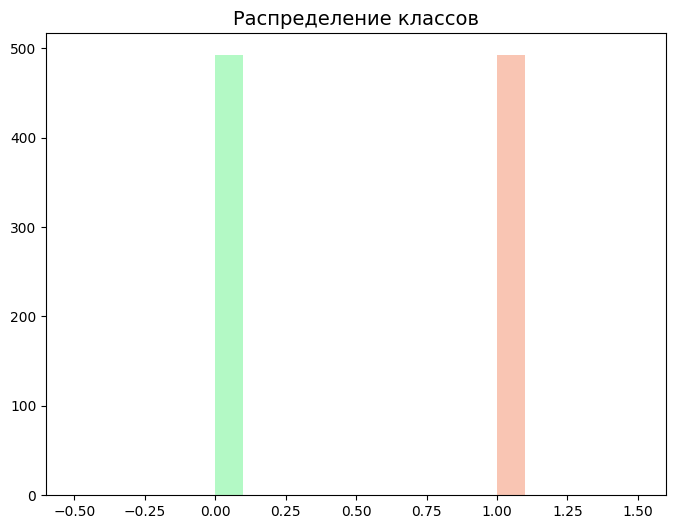

In [97]:
print('Распределение классов в подвыборке')

plt.figure(figsize=(8, 6))
# Гистограмма для класса 0
plt.hist(new_df[new_df['Class'] == 0]['Class'], color=colors[0])
# Гистограмма для класса 1
plt.hist(new_df[new_df['Class'] == 1]['Class'], color=colors[1])
# проверяем снова распределение целевой переменной

plt.title('Распределение классов', fontsize=14)


### Матрица корреляций

Корреляционные матрицы очень важны для понимания данных. Мы хотим узнать, есть ли признаки, которые оказывают сильное влияние на то, является ли конкретная транзакция мошенничеством. Однако важно, чтобы мы использовали сбалансированную подвыборку, чтобы увидеть, какие признаки имеют высокую положительную или отрицательную корреляцию в отношении мошеннических операций.


Text(0.5, 1.0, 'Матрица корреляций сбалансированной подвыборки')

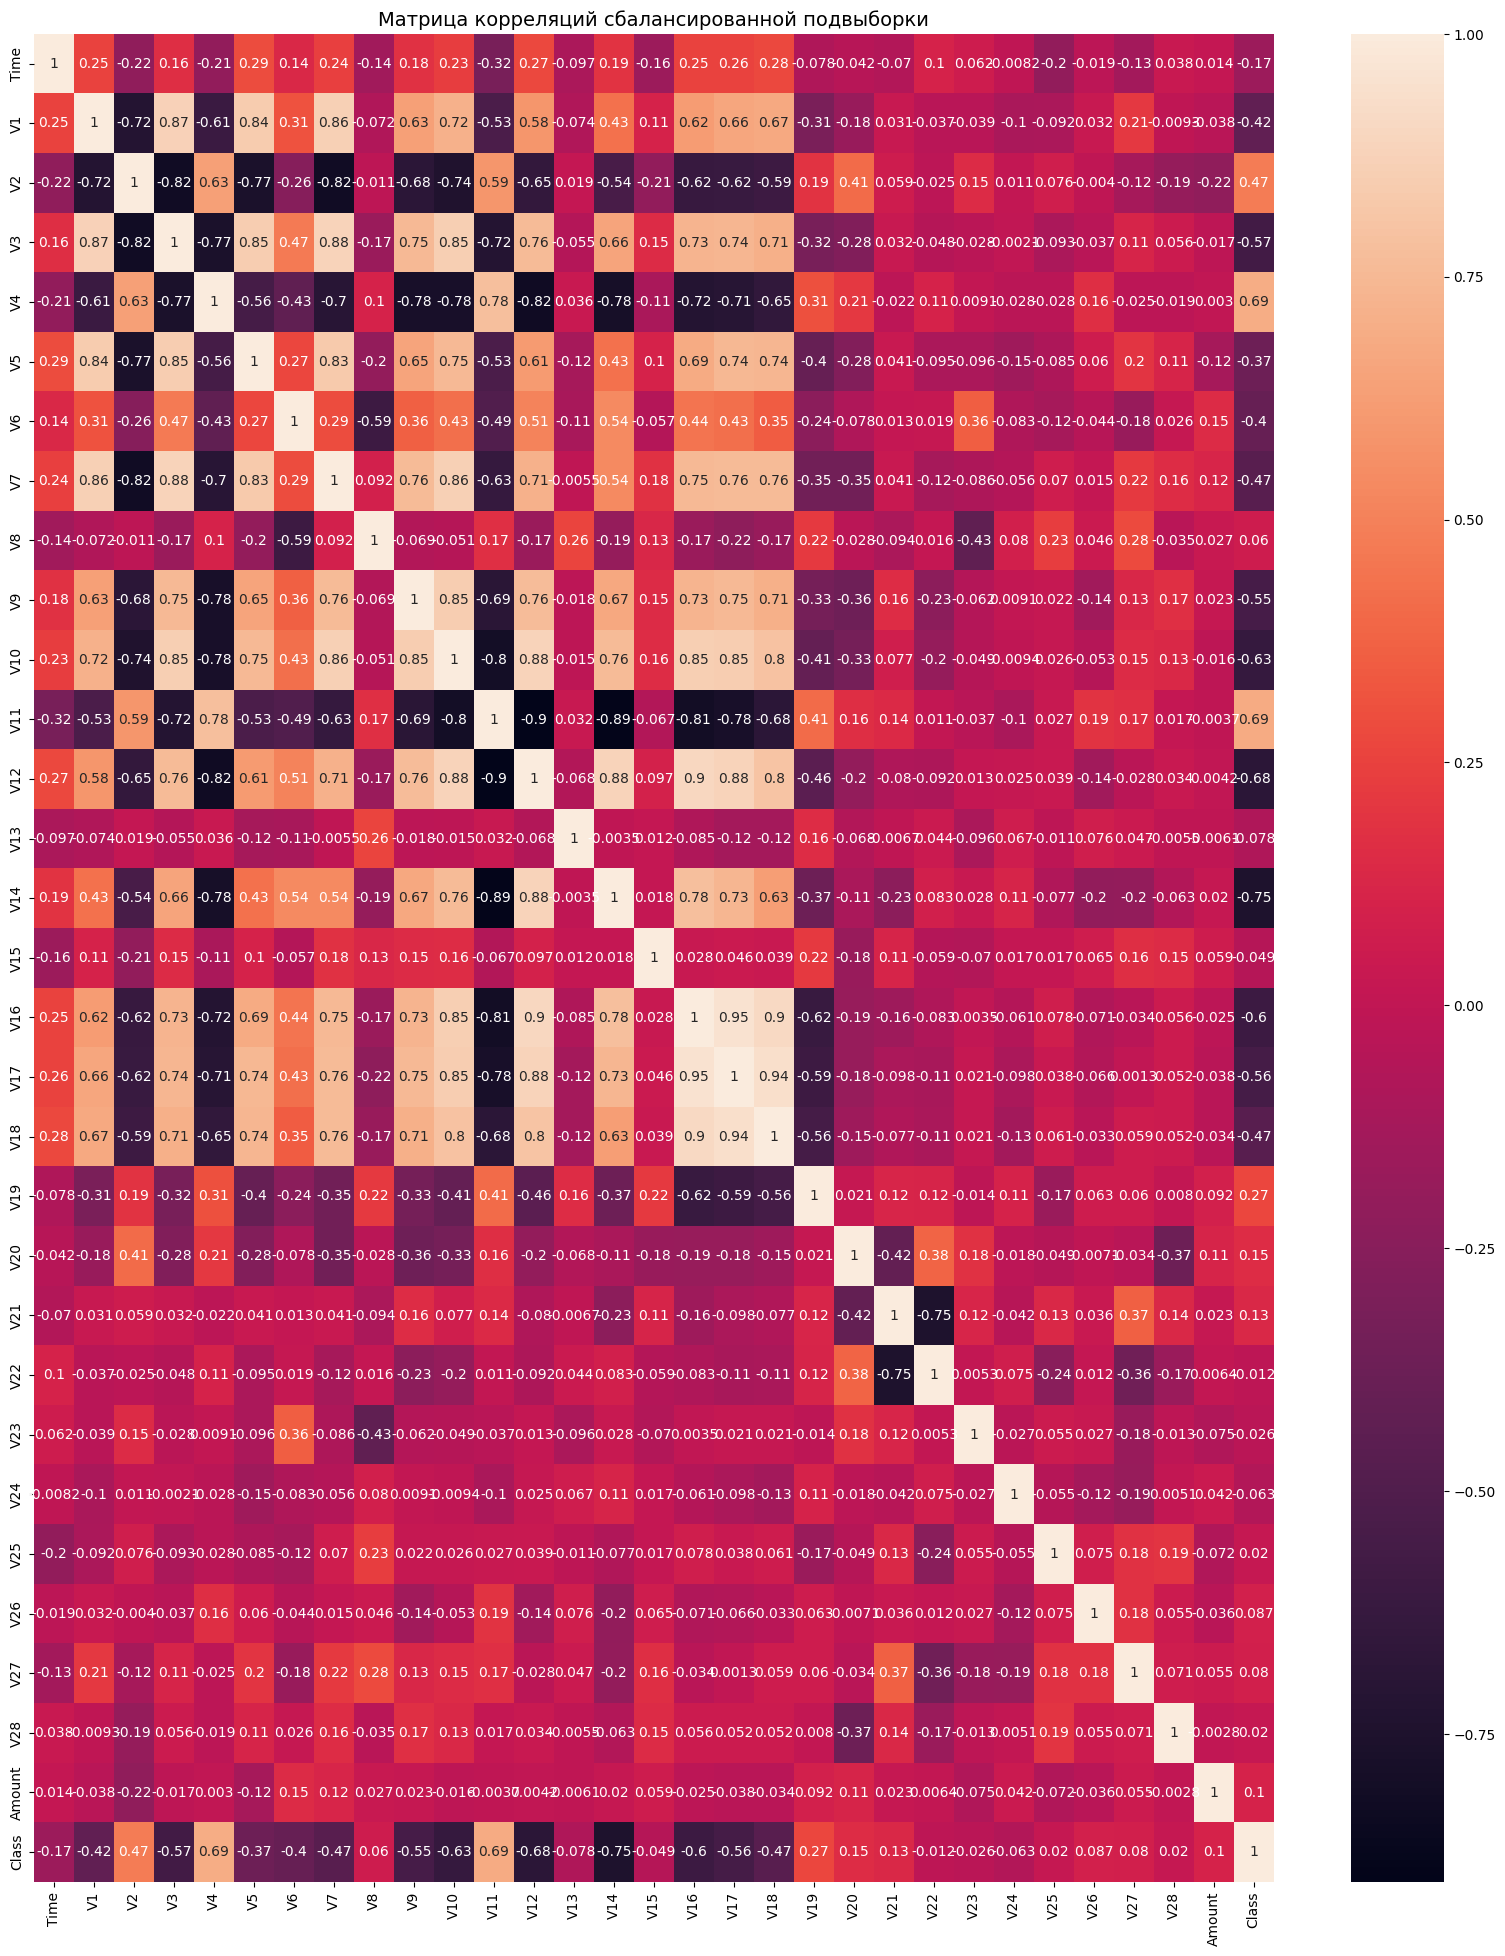

In [106]:
f, ax = plt.subplots(1, 1, figsize=(20, 24))

# Построим матрицу корреляций
corr = new_df.corr()
sns.heatmap(corr,annot=True)
ax.set_title('Матрица корреляций сбалансированной подвыборки', fontsize=14)


### Выводы:
<ul>
<li><b>Отрицательные корреляции: </b> Какие признаки  имеют отрицательную корреляцию? Другими словами, чем ниже эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция.  </li>
<li> <b> Положительные корреляции: </b> Какие признаки  положительно коррелируют? То есть, чем выше эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция. </li>
</ul>


**Важно!**

Всегда проверяйте, используете ли вы сбалансированную подвыборку в корреляционной матрице, иначе на корреляционную матрицу повлияет сильный дисбаланс между классами.

Построим теперь Boxplot.

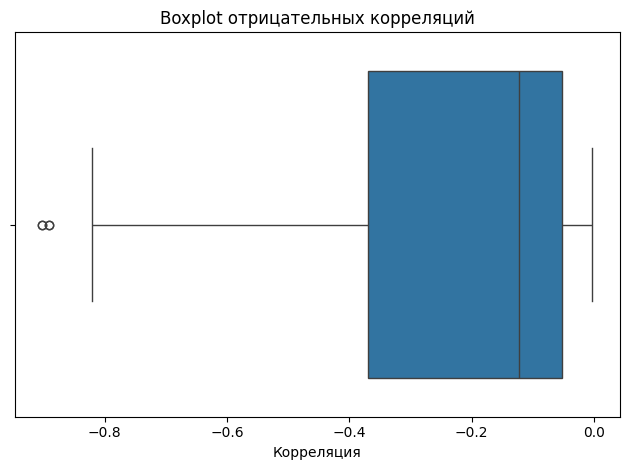

In [107]:
# Отрицательные корреляции
corr_long = corr.stack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']
negative_corr = corr_long[corr_long['Correlation'] < 0]
sns.boxplot(x='Correlation', data=negative_corr)
plt.title('Boxplot отрицательных корреляций')
plt.xlabel('Корреляция')
plt.tight_layout()
plt.show()

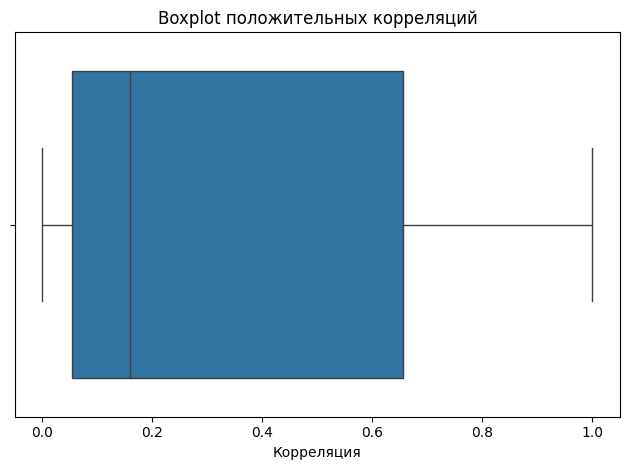

In [108]:
# Положительные корреляции
corr_long = corr.stack().reset_index()
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']
negative_corr = corr_long[corr_long['Correlation'] > 0]
sns.boxplot(x='Correlation', data=negative_corr)
plt.title('Boxplot положительных корреляций')
plt.xlabel('Корреляция')
plt.tight_layout()
plt.show()

# Какие выводы можно сделать по построенным Boxplot?

Напоминаю.

0 - это не мошеннические транзакции

1 - мошеннические транзакции

## Обработка выбросов

Наша основная цель в этом разделе - удалить выбросы из признаков, которые имеют высокую корреляцию с целевой переменной. Это положительно скажется на точности наших моделей.


### Метод межквартильного размаха:
<ul>
<li> <b>Interquartile Range (IQR): </b> Рассчитываем разницу между 75-м процентилем и 25-м процентилем. Наша цель - создать порог за пределами 75-го и 25-го процентилей, чтобы в случае, если какой-то экземпляр выборки преодолеет этот порог, он был удален.  </li>
<li> <b>Построить Boxplots: </b> С помощью boxplot легко увидеть 25-й и 75-й процентили и выбросы. </li>
</ul>

Надо быть внимательным к тому, как далеко мы хотим установить порог для удаления выбросов. Мы определяем порог путем умножения числа (например, 1.5) на интерквартильный размах. Чем выше этот порог, тем меньше выбросов будет обнаружено, а чем ниже этот порог, тем больше выбросов будет обнаружено.  <br><br>

Мы хотим больше сосредоточиться именно на сильных выбросах, а не просто на выбросах. Почему? Потому что удалив все выбросы, мы можем столкнуться с риском потери информации, что приведет к снижению точности наших моделей.


### Итого:
<ul>
<li> <b> Строим распределения </b>  </li>
<li><b>Определяем порог </b> </li>
<li> <b>Удаляем выбросы </b> </li>
<li> <b> Строим Boxplot </b> </li>
</ul>

Text(0.5, 1.0, 'Распределение V17')

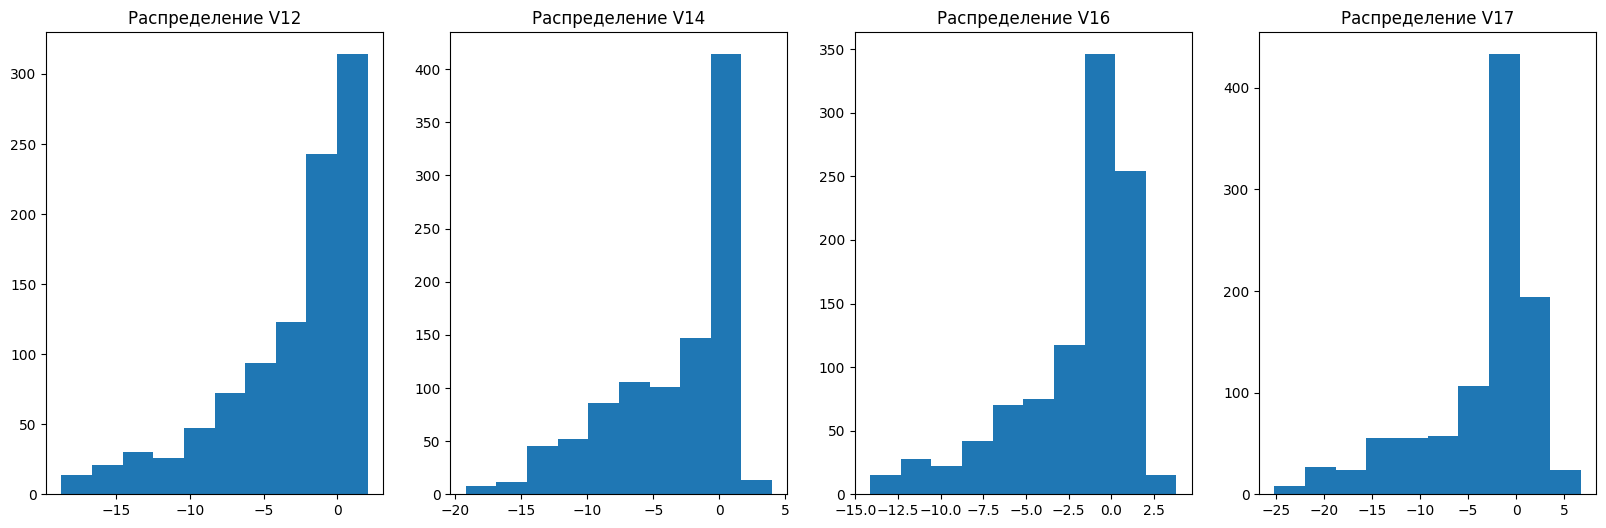

In [109]:
# Строим распределения для признаков с отрицательной корреляцией

from scipy.stats import norm

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 6))

####
ax1.hist(new_df['V12'])
ax1.set_title('Распределение V12')
####
ax2.hist(new_df['V14'])
ax2.set_title('Распределение V14')
####
ax3.hist(new_df['V16'])
ax3.set_title('Распределение V16')
####
ax4.hist(new_df['V17'])
ax4.set_title('Распределение V17')

In [102]:
# Удаление выбросов из признака V17
v17_fraud = new_df['V17'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('Квартиль 25: {} | Квартиль 75: {}'.format(q25, q75))
v17_iqr = q75 - q25
print('iqr: {}'.format(v17_iqr))

v17_cut_off = v17_iqr * 0.05
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('Порог: {}'.format(v17_cut_off))
print('V17 нижняя граница: {}'.format(v17_lower))
print('V17 верхняя граница: {}'.format(v17_upper))

outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('Количество выбросов: {}'.format(len(outliers)))
new_df_without_outliers  = new_df.drop(new_df[(new_df['V17'] > v17_upper)].index)
new_df_without_outliers  = new_df.drop(new_df[(new_df['V17'] < v17_lower)].index)
print('----' * 44)

Квартиль 25: -11.945057187644576 | Квартиль 75: -1.34193993162032
iqr: 10.603117256024255
Порог: 0.5301558628012127
V17 нижняя граница: -12.475213050445788
V17 верхняя граница: -0.8117840688191073
Количество выбросов: 222
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


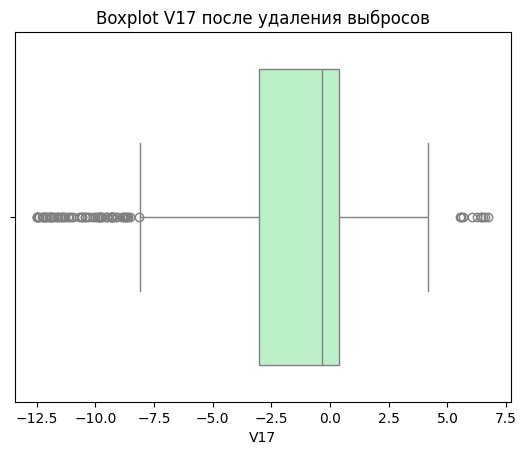

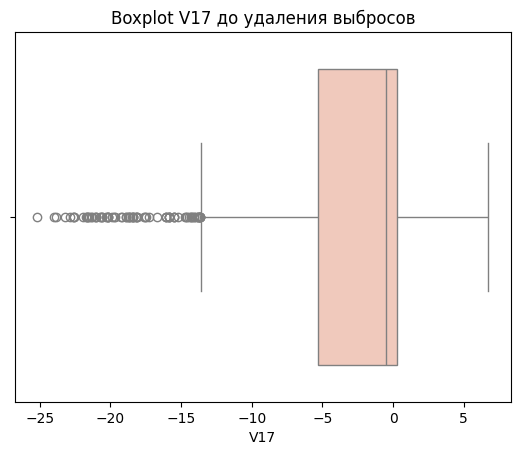

In [103]:

colors = ['#B3F9C5', '#f9c5b3']
# Boxplot для признака V17 после удаления выбросов
sns.boxplot(x='V17', data=new_df_without_outliers,color = colors[0])
plt.title('Boxplot V17 после удаления выбросов')
plt.show()
# Boxplot для признака V17 до удаления выбросов
sns.boxplot(x='V17', data=new_df,color = colors[1])
plt.title('Boxplot V17 до удаления выбросов')
plt.show()
# И для остальных признаков тоже



plt.show()

Признак Time
Квартиль 25: -11.945057187644576 | Квартиль 75: 128483.0
iqr: 128494.94505718765
Порог: 0.5301558628012127
Нижняя граница: -6436.692310047027
Верхняя граница: 134907.74725285938
Количество выбросов: 0


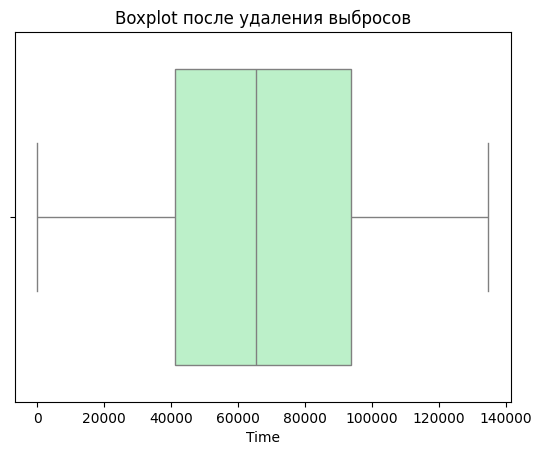

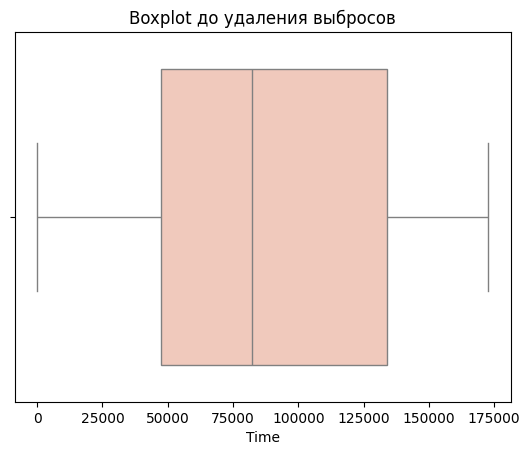

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V1
Квартиль 25: -11.945057187644576 | Квартиль 75: -0.419200076257679
iqr: 11.525857111386896
Порог: 0.5301558628012127
Нижняя граница: -12.521350043213921
Верхняя граница: 0.15709277931166582
Количество выбросов: 199


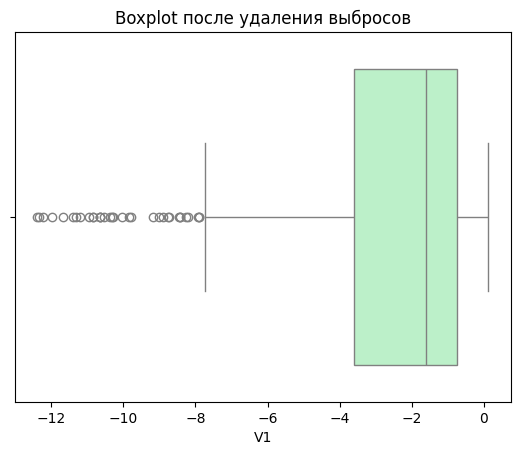

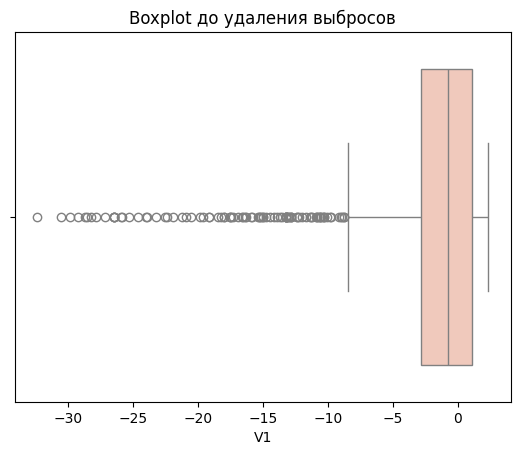

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V2
Квартиль 25: -11.945057187644576 | Квартиль 75: 4.9712573249056025
iqr: 16.91631451255018
Порог: 0.5301558628012127
Нижняя граница: -12.790872913272084
Верхняя граница: 5.817073050533112
Количество выбросов: 103


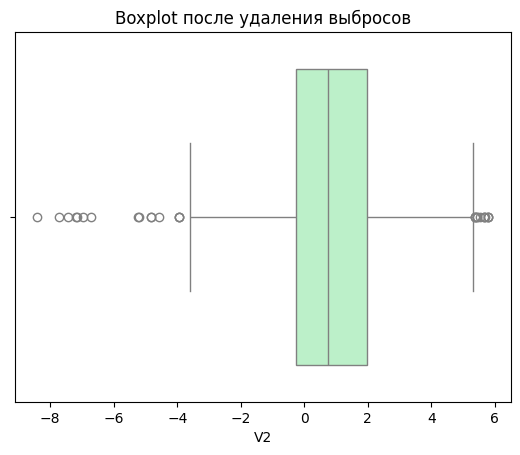

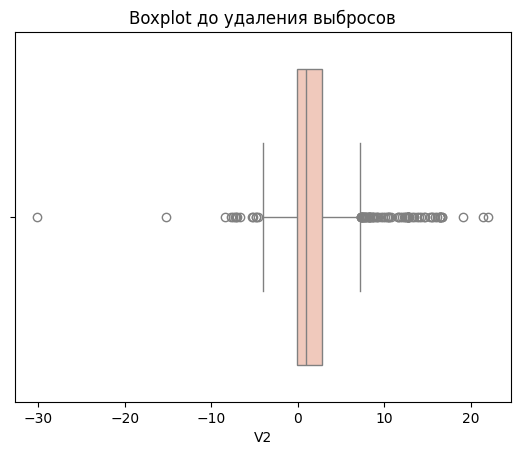

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V3
Квартиль 25: -11.945057187644576 | Квартиль 75: -2.27618472719291
iqr: 9.668872460451666
Порог: 0.5301558628012127
Нижняя граница: -12.42850081066716
Верхняя граница: -1.7927411041703267
Количество выбросов: 248


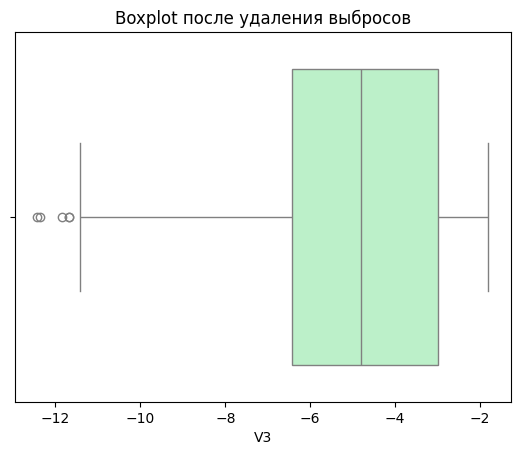

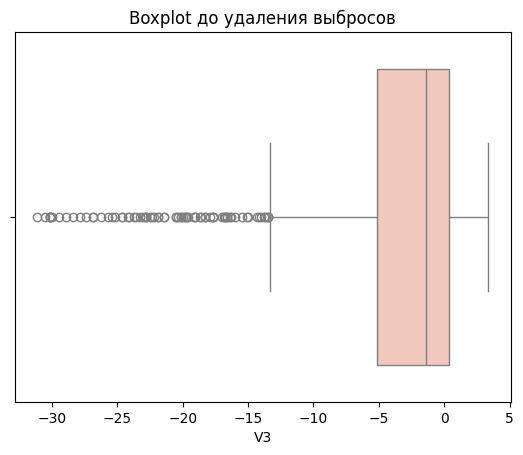

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V4
Квартиль 25: -11.945057187644576 | Квартиль 75: 6.3487294567140955
iqr: 18.293786644358672
Порог: 0.5301558628012127
Нижняя граница: -12.85974651986251
Верхняя граница: 7.263418788932029
Количество выбросов: 93


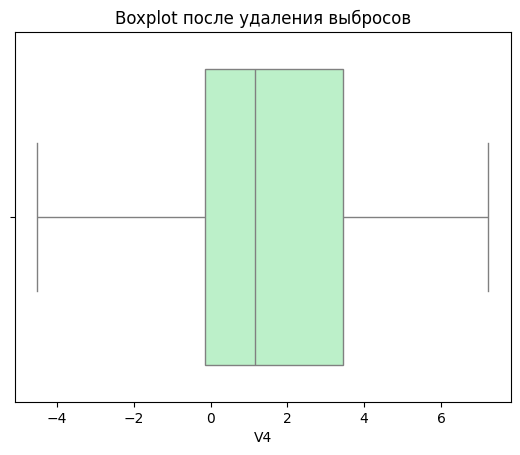

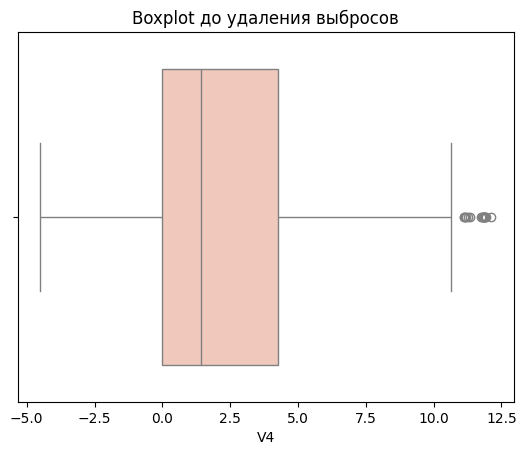

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V5
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.21456159835449123
iqr: 12.159618785999067
Порог: 0.5301558628012127
Нижняя граница: -12.553038126944529
Верхняя граница: 0.8225425376544446
Количество выбросов: 170


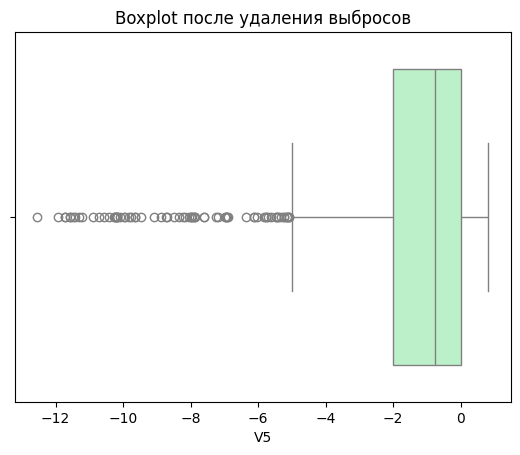

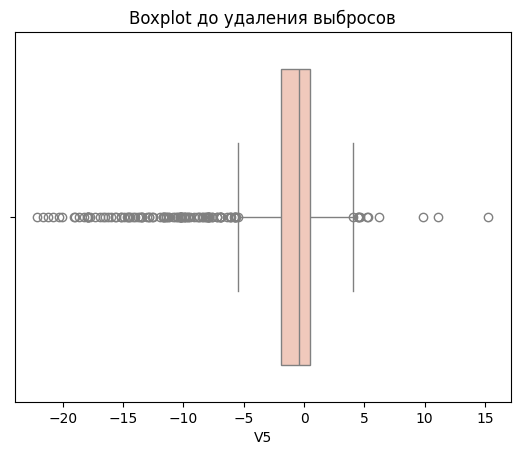

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V6
Квартиль 25: -11.945057187644576 | Квартиль 75: -0.41321639049909276
iqr: 11.531840797145483
Порог: 0.5301558628012127
Нижняя граница: -12.52164922750185
Верхняя граница: 0.16337564935818139
Количество выбросов: 199


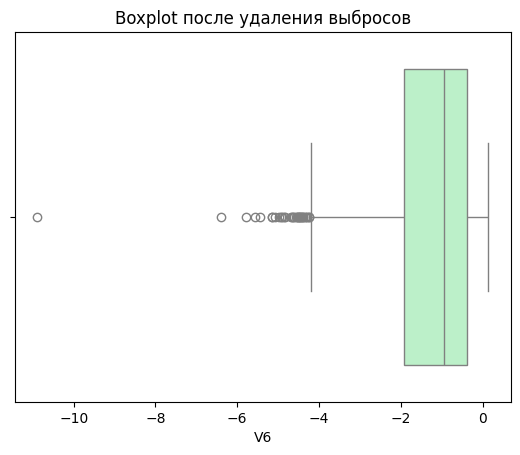

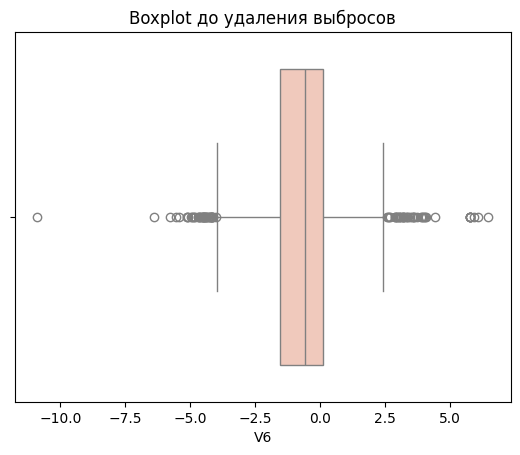

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V7
Квартиль 25: -11.945057187644576 | Квартиль 75: -0.945954357800134
iqr: 10.99910282984444
Порог: 0.5301558628012127
Нижняя граница: -12.495012329136797
Верхняя граница: -0.395999216307912
Количество выбросов: 218


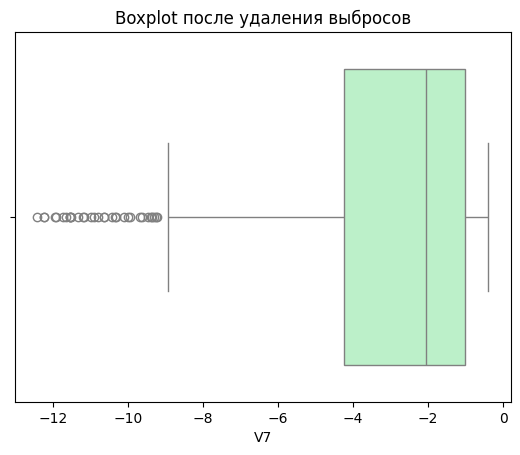

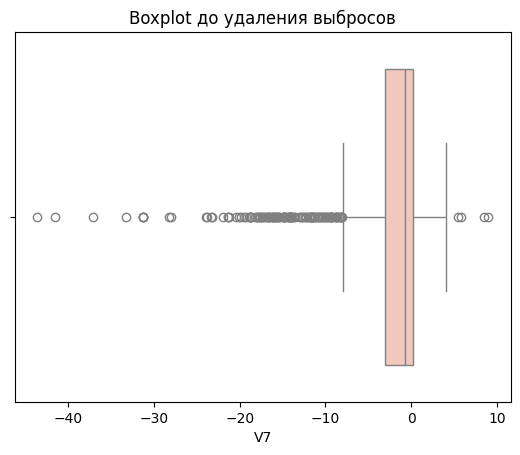

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V8
Квартиль 25: -11.945057187644576 | Квартиль 75: 1.76487895283846
iqr: 13.709936140483036
Порог: 0.5301558628012127
Нижняя граница: -12.630553994668727
Верхняя граница: 2.450375759862612
Количество выбросов: 129


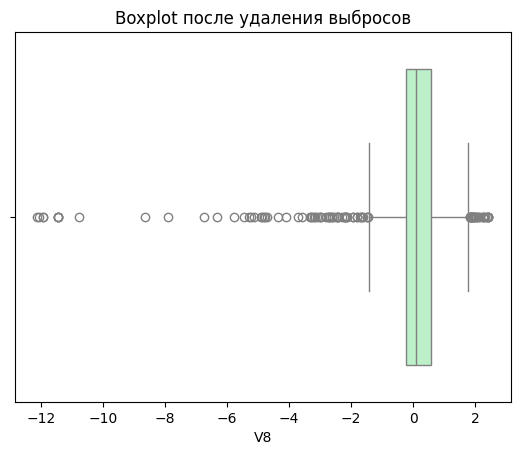

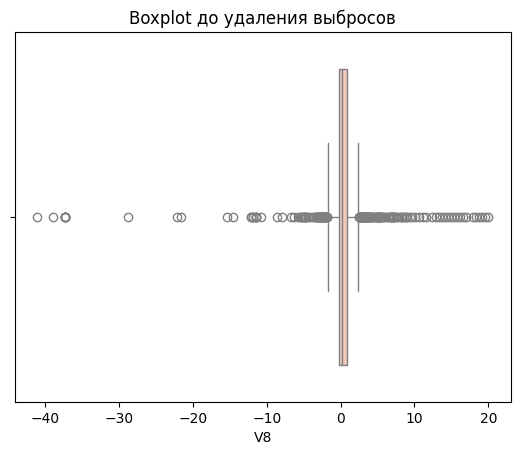

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V9
Квартиль 25: -11.945057187644576 | Квартиль 75: -0.7878501277025964
iqr: 11.15720705994198
Порог: 0.5301558628012127
Нижняя граница: -12.502917540641675
Верхняя граница: -0.22998977470549742
Количество выбросов: 216


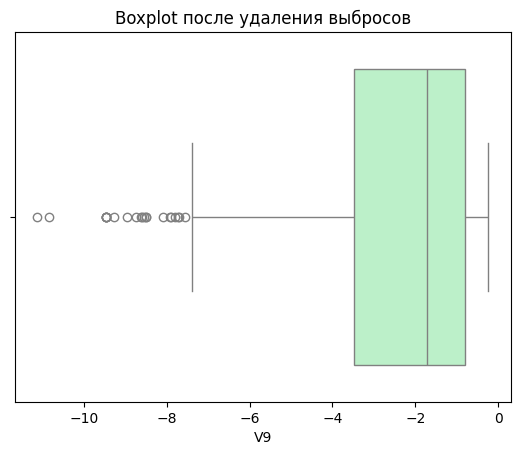

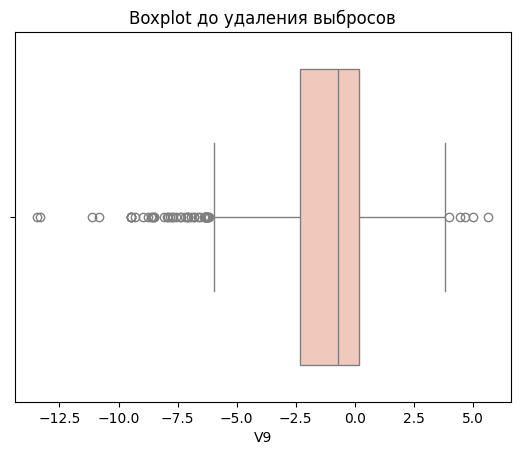

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V10
Квартиль 25: -11.945057187644576 | Квартиль 75: -2.6141839131895623
iqr: 9.330873274455014
Порог: 0.5301558628012127
Нижняя граница: -12.411600851367327
Верхняя граница: -2.1476402494668116
Количество выбросов: 256


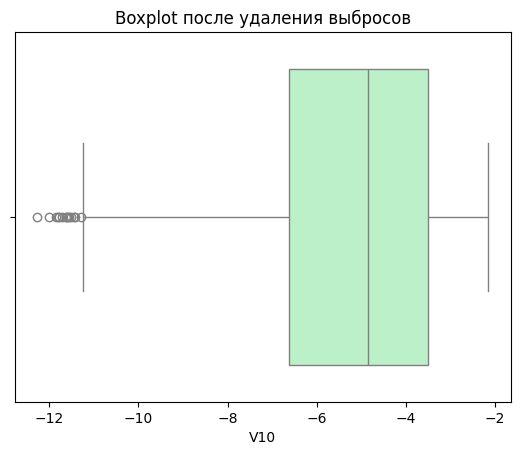

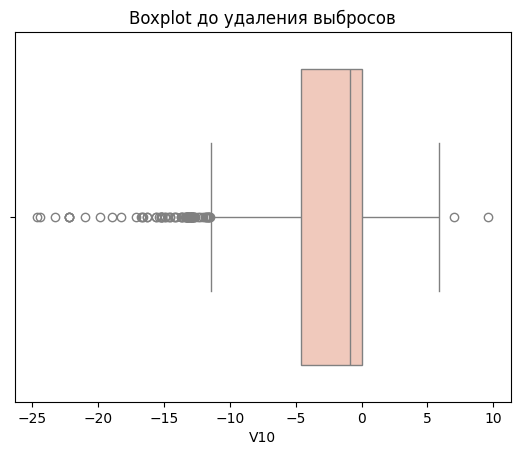

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V11
Квартиль 25: -11.945057187644576 | Квартиль 75: 5.307077600096335
iqr: 17.25213478774091
Порог: 0.5301558628012127
Нижняя граница: -12.807663927031621
Верхняя граница: 6.16968433948338
Количество выбросов: 101


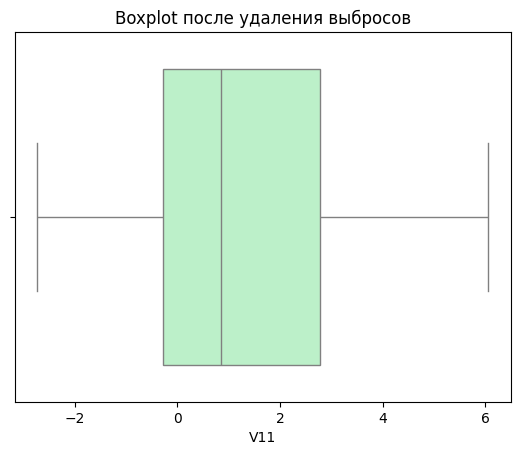

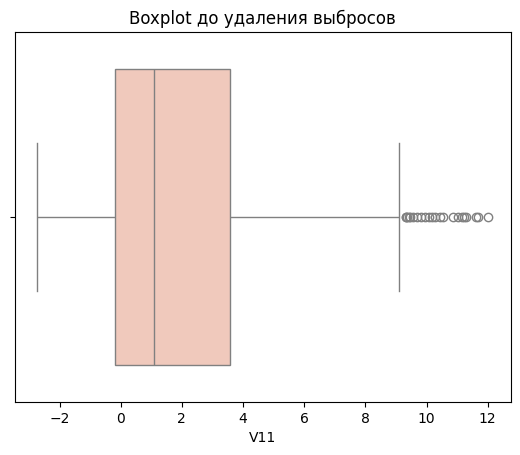

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V12
Квартиль 25: -11.945057187644576 | Квартиль 75: -2.97408802538493
iqr: 8.970969162259646
Порог: 0.5301558628012127
Нижняя граница: -12.393605645757559
Верхняя граница: -2.5255395672719474
Количество выбросов: 262


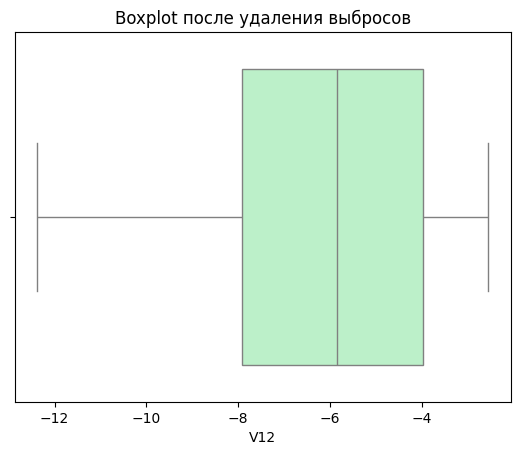

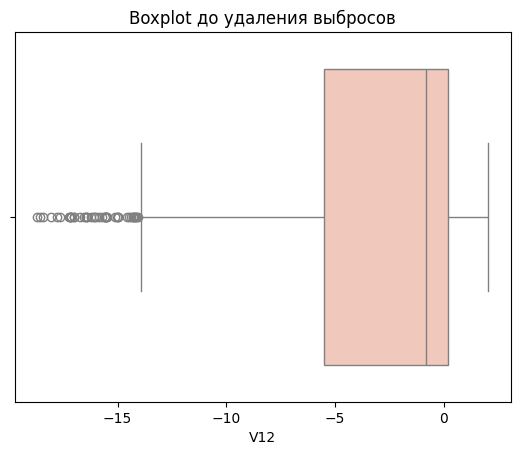

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V13
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.67296399734103
iqr: 12.618021184985606
Порог: 0.5301558628012127
Нижняя граница: -12.575958246893856
Верхняя граница: 1.3038650565903103
Количество выбросов: 159


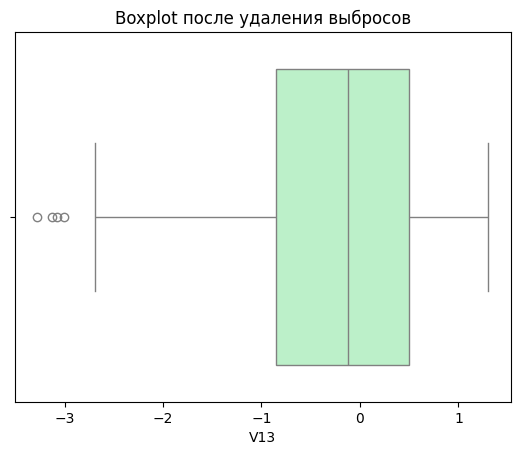

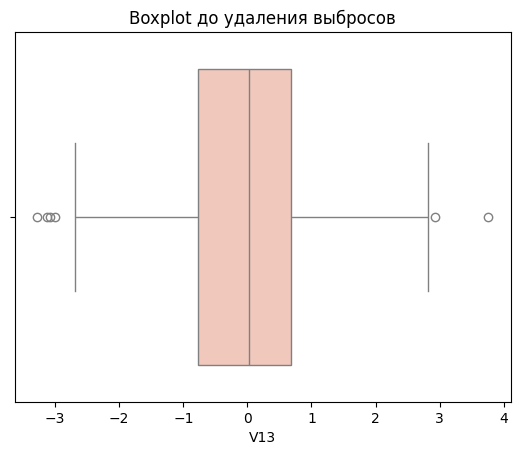

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V14
Квартиль 25: -11.945057187644576 | Квартиль 75: -4.282820849486865
iqr: 7.662236338157711
Порог: 0.5301558628012127
Нижняя граница: -12.32816900455246
Верхняя граница: -3.899709032578979
Количество выбросов: 302


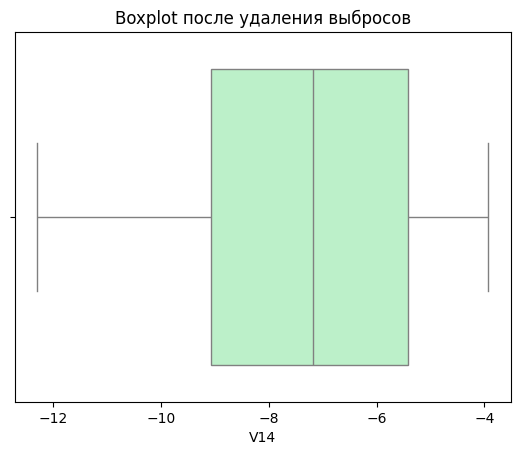

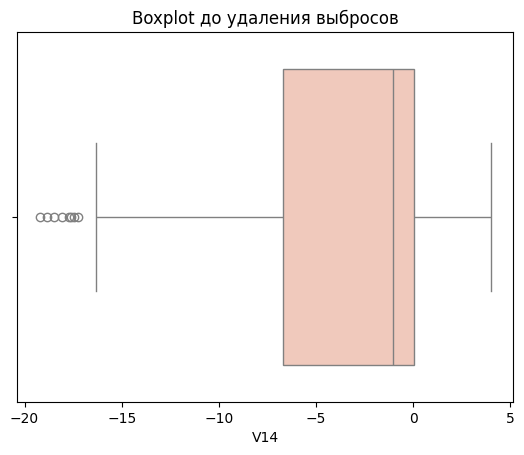

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V15
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.6091891292834305
iqr: 12.554246316928007
Порог: 0.5301558628012127
Нижняя граница: -12.572769503490976
Верхняя граница: 1.2369014451298308
Количество выбросов: 159


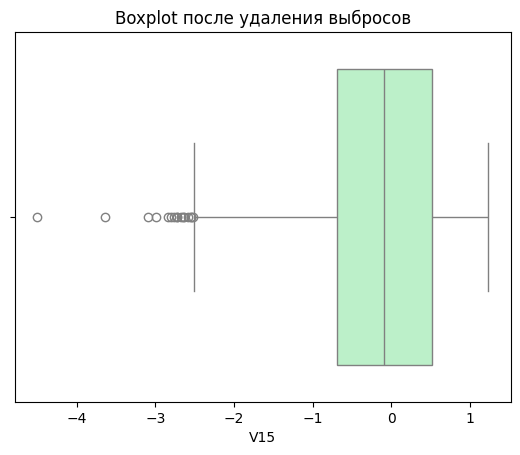

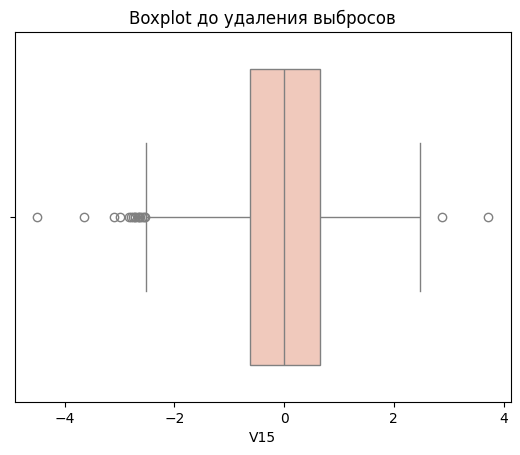

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V16
Квартиль 25: -11.945057187644576 | Квартиль 75: -1.22604320393038
iqr: 10.719013983714195
Порог: 0.5301558628012127
Нижняя граница: -12.481007886830286
Верхняя граница: -0.6900925047446701
Количество выбросов: 221


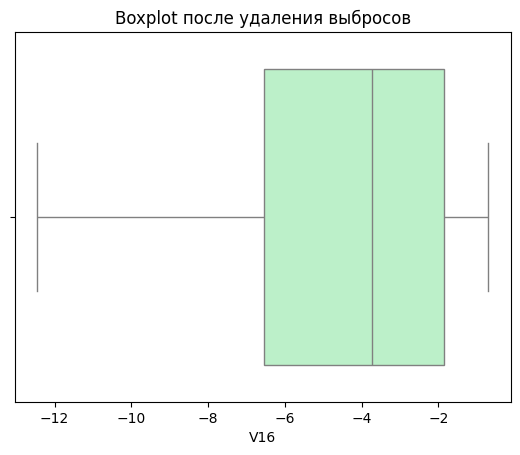

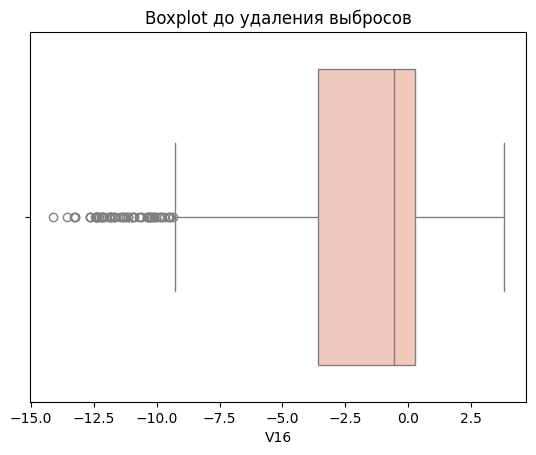

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V17
Квартиль 25: -11.945057187644576 | Квартиль 75: -1.34193993162032
iqr: 10.603117256024255
Порог: 0.5301558628012127
Нижняя граница: -12.475213050445788
Верхняя граница: -0.8117840688191073
Количество выбросов: 222


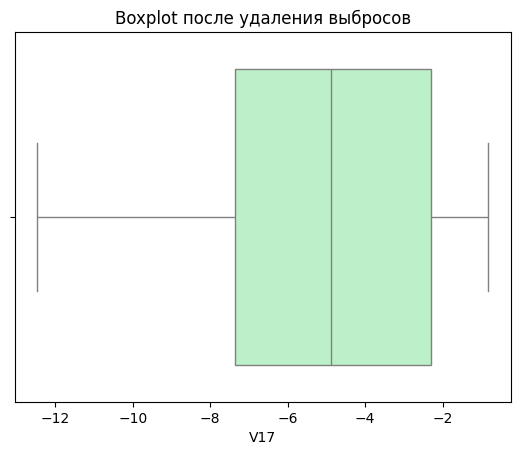

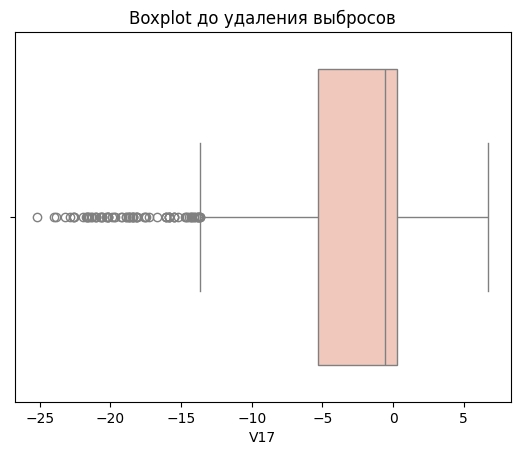

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V18
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.0917721039711343
iqr: 12.03682929161571
Порог: 0.5301558628012127
Нижняя граница: -12.54689865222536
Верхняя граница: 0.6936135685519199
Количество выбросов: 176


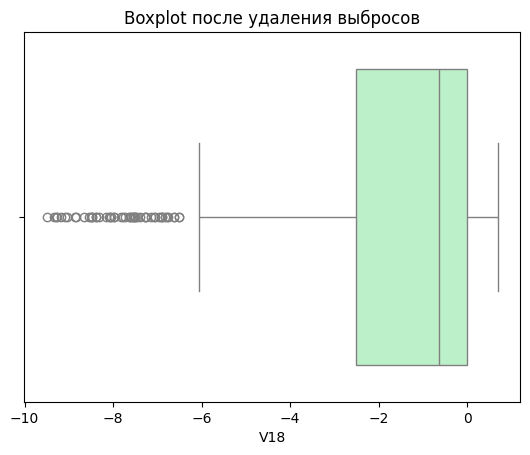

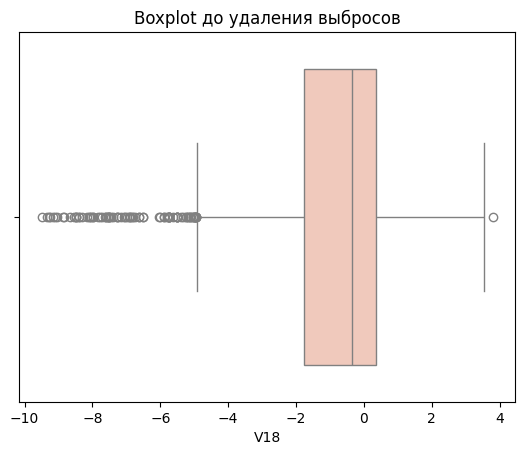

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V19
Квартиль 25: -11.945057187644576 | Квартиль 75: 1.6493177596837325
iqr: 13.594374947328308
Порог: 0.5301558628012127
Нижняя граница: -12.624775935010991
Верхняя граница: 2.329036507050148
Количество выбросов: 130


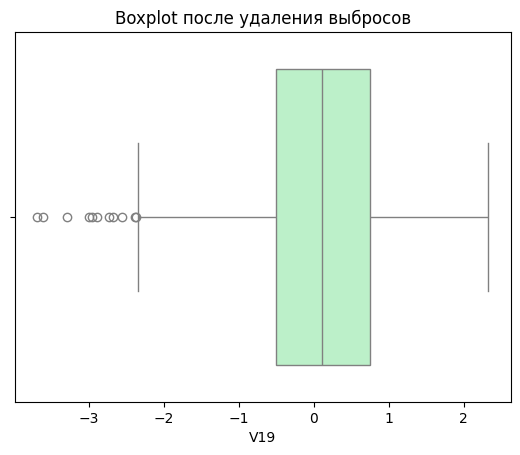

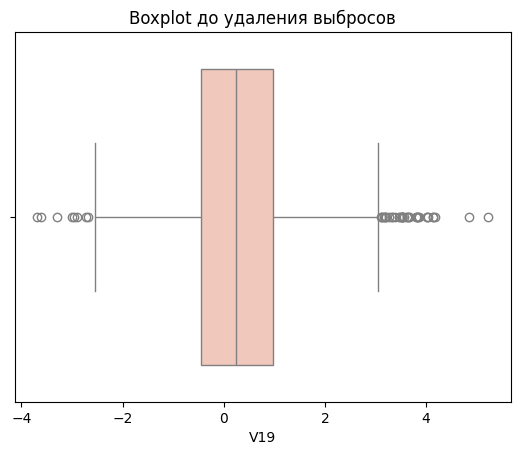

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V20
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.8224449078319616
iqr: 12.767502095476537
Порог: 0.5301558628012127
Нижняя граница: -12.583432292418403
Верхняя граница: 1.4608200126057884
Количество выбросов: 154


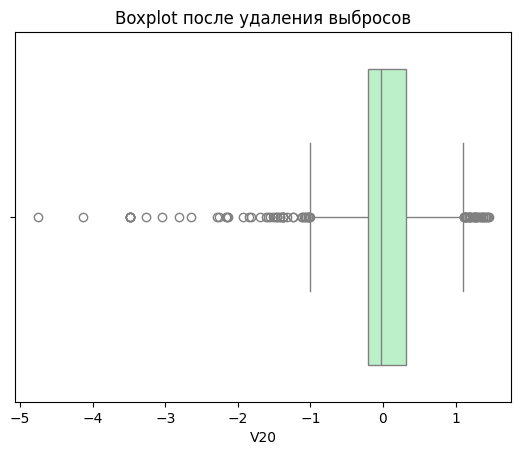

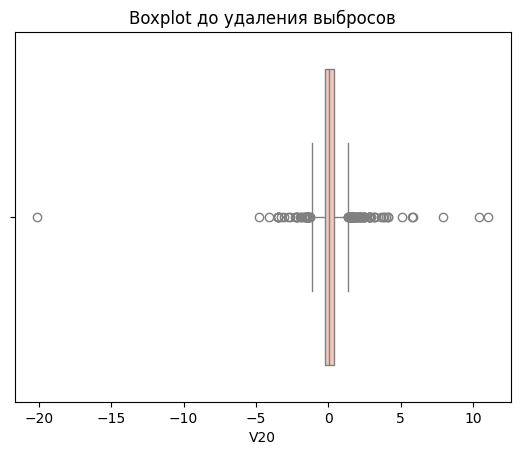

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V21
Квартиль 25: -11.945057187644576 | Квартиль 75: 1.24461062761436
iqr: 13.189667815258936
Порог: 0.5301558628012127
Нижняя граница: -12.604540578407523
Верхняя граница: 1.904094018377307
Количество выбросов: 138


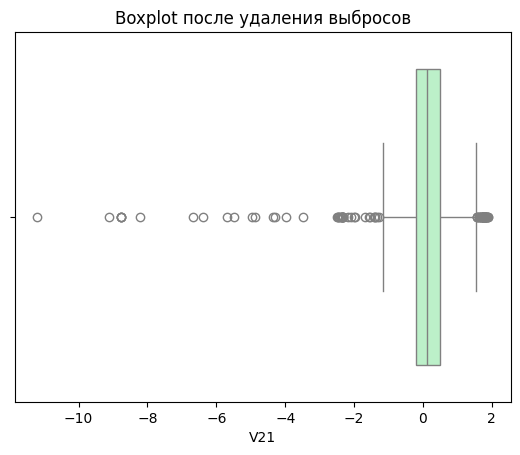

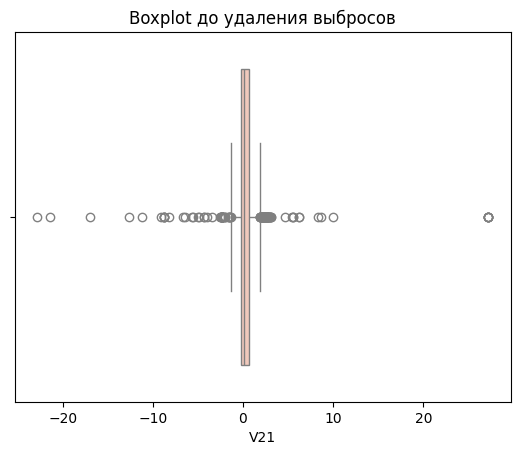

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V22
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.6174743628487113
iqr: 12.562531550493286
Порог: 0.5301558628012127
Нижняя граница: -12.57318376516924
Верхняя граница: 1.2456009403733757
Количество выбросов: 159


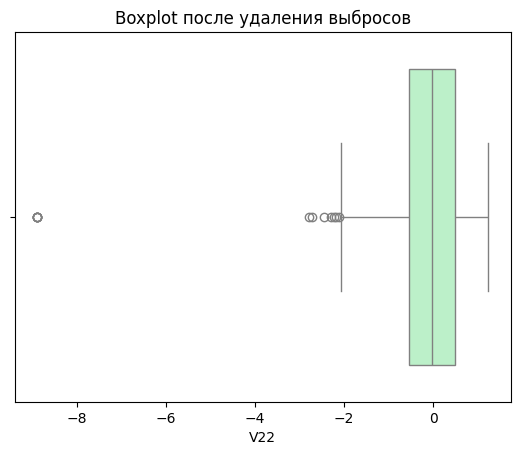

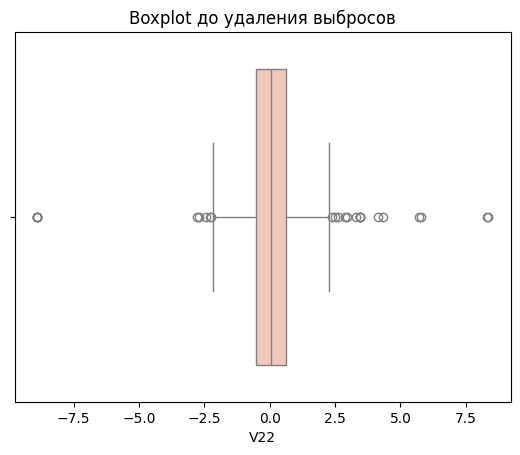

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V23
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.30837812121152874
iqr: 12.253435308856105
Порог: 0.5301558628012127
Нижняя граница: -12.55772895308738
Верхняя граница: 0.9210498866543341
Количество выбросов: 164


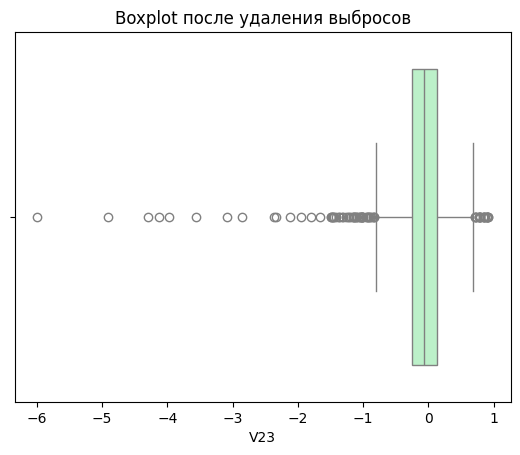

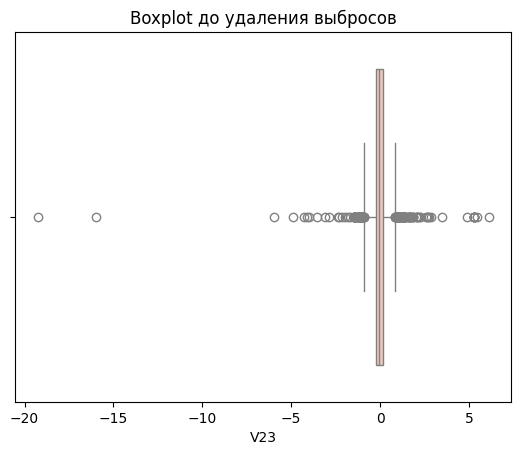

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V24
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.28532797679163324
iqr: 12.230385164436209
Порог: 0.5301558628012127
Нижняя граница: -12.556576445866387
Верхняя граница: 0.8968472350134438
Количество выбросов: 166


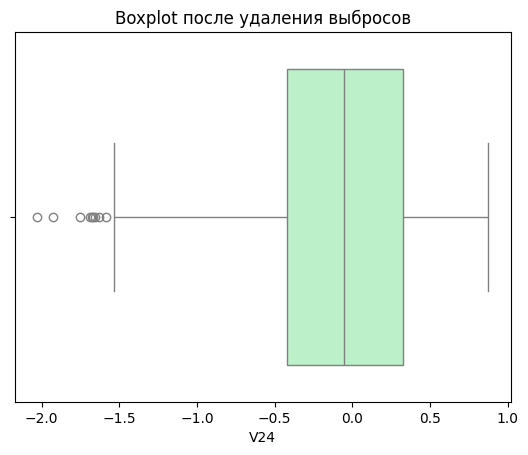

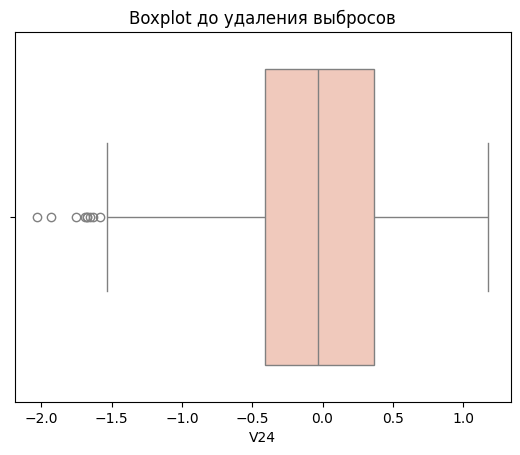

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V25
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.456514808553085
iqr: 12.40157199619766
Порог: 0.5301558628012127
Нижняя граница: -12.565135787454459
Верхняя граница: 1.076593408362968
Количество выбросов: 163


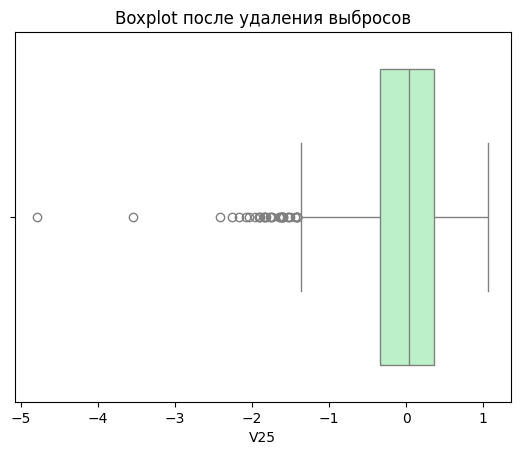

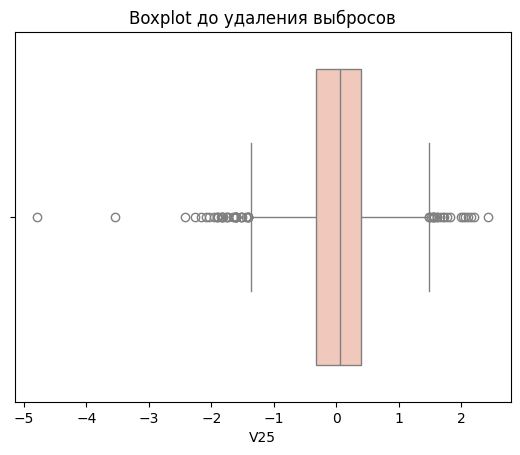

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V26
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.3967328794767663
iqr: 12.341790067121343
Порог: 0.5301558628012127
Нижняя граница: -12.562146691000644
Верхняя граница: 1.0138223828328334
Количество выбросов: 163


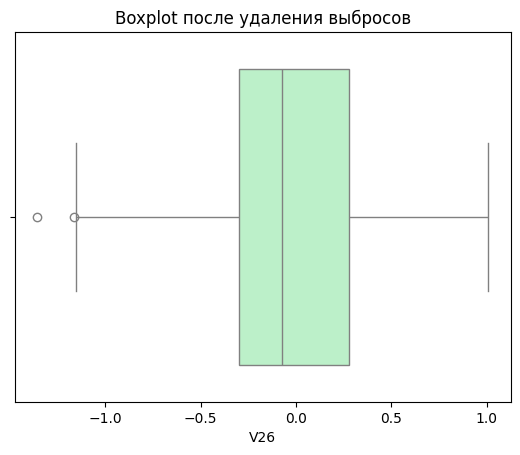

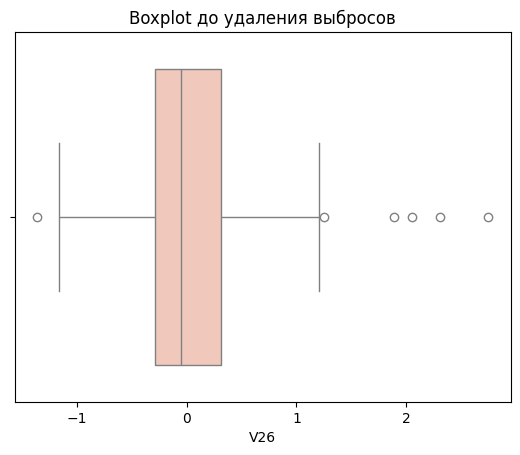

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V27
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.8260294974751907
iqr: 12.771086685119766
Порог: 0.5301558628012127
Нижняя граница: -12.583611521900565
Верхняя граница: 1.464583831731179
Количество выбросов: 154


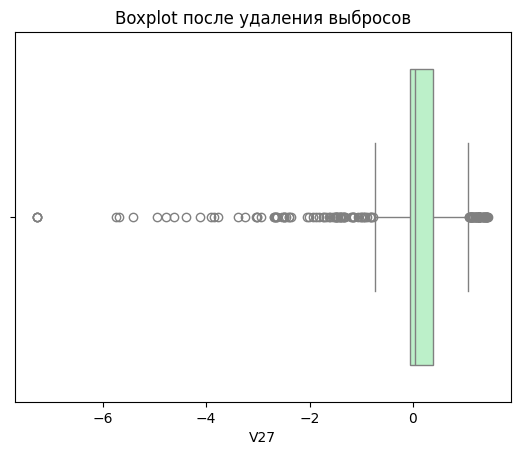

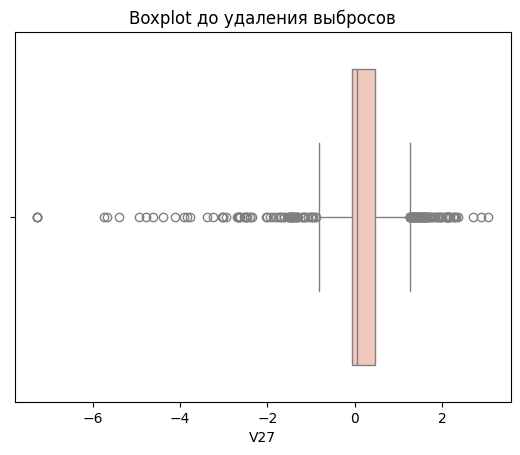

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак V28
Квартиль 25: -11.945057187644576 | Квартиль 75: 0.3811518707176925
iqr: 12.326209058362268
Порог: 0.5301558628012127
Нижняя граница: -12.56136764056269
Верхняя граница: 0.997462323635806
Количество выбросов: 163


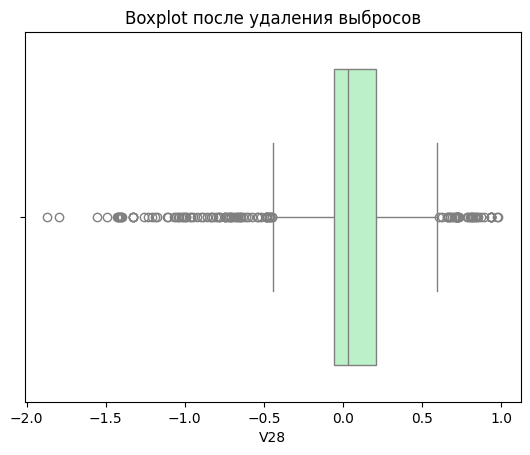

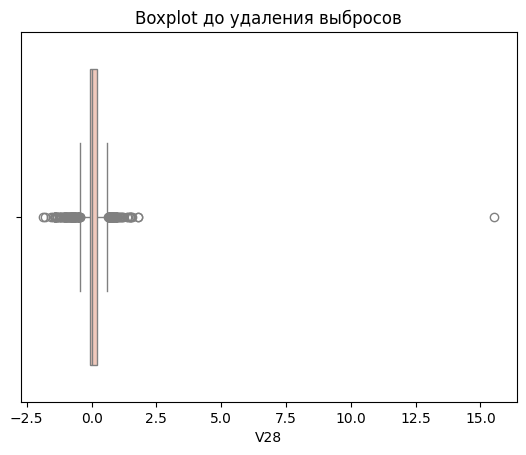

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Признак Amount
Квартиль 25: -11.945057187644576 | Квартиль 75: 105.89
iqr: 117.83505718764458
Порог: 0.5301558628012127
Нижняя граница: -17.836810047026805
Верхняя граница: 111.78175285938224
Количество выбросов: 47


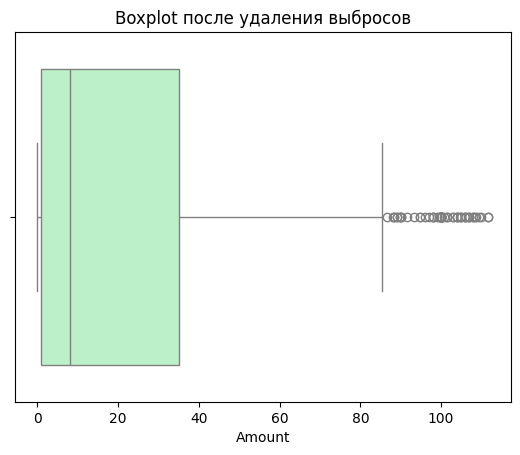

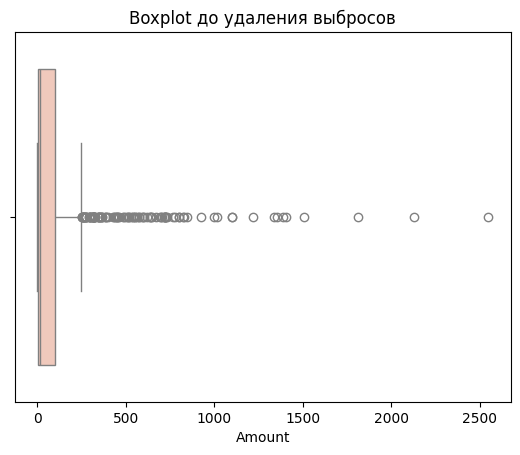

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [110]:
def delete_outliers(x):
  v_fraud = new_df[x].loc[new_df['Class'] == 1].values
  q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v_fraud, 75)
  print("Признак " + x)
  print('Квартиль 25: {} | Квартиль 75: {}'.format(q25, q75))
  v_iqr = q75 - q25
  print('iqr: {}'.format(v_iqr))

  v_cut_off = v_iqr * 0.05
  v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
  print('Порог: {}'.format(v17_cut_off))
  print('Нижняя граница: {}'.format(v_lower))
  print('Верхняя граница: {}'.format(v_upper))

  outliers = [x for x in v17_fraud if x < v_lower or x > v_upper]
  print('Количество выбросов: {}'.format(len(outliers)))

  new_df_without_outliers  = new_df.drop(new_df[(new_df[x] > v_upper) | (new_df[x] < v_lower)].index)
  sns.boxplot(x=x, data=new_df_without_outliers,color = colors[0])
  plt.title('Boxplot после удаления выбросов')
  plt.show()
  # Boxplot для признака V17 до удаления выбросов
  sns.boxplot(x=x, data=new_df,color = colors[1])
  plt.title('Boxplot до удаления выбросов')
  plt.show()
  print('----' * 44)
  return new_df_without_outliers
for x in new_df.columns.drop('Class'):
  new_df_without_outliers = delete_outliers(x)

In [112]:
new_df = new_df_without_outliers

In [113]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,...,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.000000,788.00000,788.000000
mean,88132.374365,-2.407423,2.230114,-3.555356,2.358562,-1.458175,-0.799613,-3.133882,0.244052,-1.332098,...,0.311760,-0.005168,-0.010842,-0.075799,0.050758,0.019495,0.073444,0.073139,23.68547,0.477157
std,48503.744410,5.914357,3.761432,6.632127,3.282313,4.449661,1.762862,6.145263,5.392339,2.371408,...,3.087095,1.256607,0.989251,0.557932,0.668036,0.450607,1.079713,0.405323,31.92961,0.499795
min,82.000000,-30.552380,-15.282636,-31.103685,-4.507079,-22.105532,-10.886820,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-15.981649,-1.755046,-3.536716,-1.163479,-7.263482,-1.552593,0.00000,0.000000
25%,46559.750000,-2.606947,0.132363,-5.138122,-0.078849,-1.515673,-1.691217,-3.212190,-0.182059,-2.373396,...,-0.201837,-0.563036,-0.227233,-0.420000,-0.311024,-0.266983,-0.041139,-0.046802,1.00000,0.000000
50%,80284.500000,-0.603691,1.144143,-1.138144,1.346809,-0.253074,-0.680886,-0.762979,0.170590,-0.651613,...,0.118153,0.018658,-0.051107,-0.031239,0.076685,-0.028525,0.059610,0.036890,8.06500,0.000000
75%,134055.250000,1.137842,3.112490,0.498781,4.416960,0.630409,0.031902,0.168366,0.841194,0.167772,...,0.550700,0.584547,0.141732,0.366944,0.425435,0.318423,0.466568,0.230018,34.99250,1.000000
max,172734.000000,2.346280,22.057729,3.371889,12.114672,15.275762,6.474115,2.518189,20.007208,5.656877,...,27.202839,8.361985,5.466230,1.179479,2.208209,2.745261,2.880563,1.779364,111.70000,1.000000


### Понижение размерности и кластеризация

Для того, чтобы убедиться, что наши классы являются разделимыми (иначе строить модели нет смысла), выполним кластеризацию с помощью трех различных техник кластеризации.



In [121]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']
X.drop(['Time','Amount'], axis=1, inplace=True) # Tак как Time и Amount не коррелируют почти с таргетом
# T-SNE алгоритм
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
t1 = time.time()
print("T-SNE заняло {:.2} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
pca = PCA(n_components=2,random_state=42)
X_reduced_pca = pca.fit_transform(X)
t1 = time.time()
print("PCA заняло {:.2} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()
svd = TruncatedSVD(n_components=2,random_state=42)
X_reduced_svd = svd.fit_transform(X)
t1 = time.time()
print("Truncated SVD заняло {:.2} сек".format(t1 - t0))

T-SNE заняло 4.9 сек
PCA заняло 0.0035 сек
Truncated SVD заняло 0.013 сек


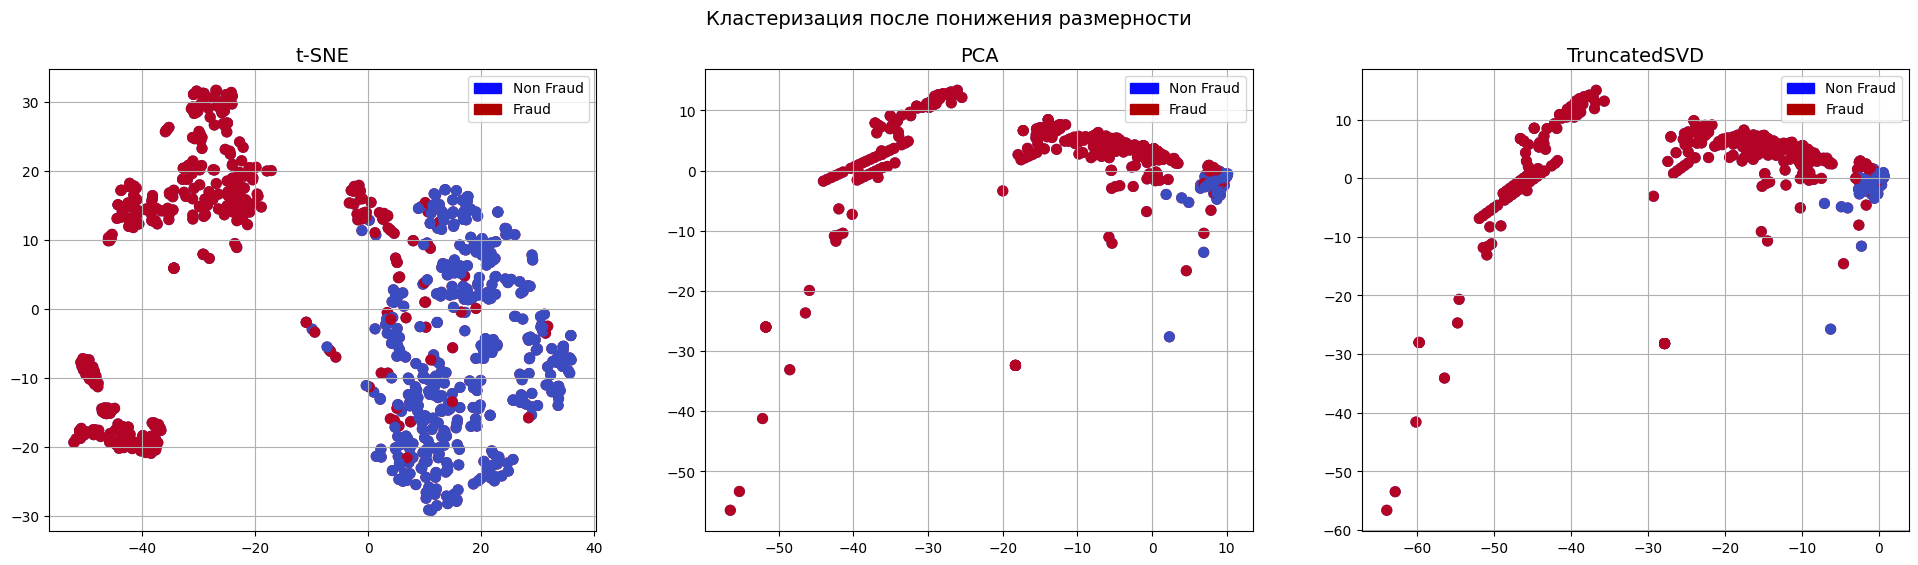

In [122]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])
# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])
# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('TruncatedSVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

<h3> Выводы: </h3>
<ul>
<li>Алгоритм t-SNE может довольно точно кластеризовать случаи мошенничества и не мошенничества в нашем наборе данных. </li>
<li> Классы целевой переменной однозначно разделимы, а значит мы можем строить модели! </li>
</ul>

## Продолжение следует .....



<h3 style="text-align: center;">Материалы для изучения scikit-learn:<b></b></h3>

*1) Официальный сайт с подробными описаниями моделей и методов : https://scikit-learn.org/stable/user_guide.html*

*2) Полезный репозиторий с блокнотами: https://github.com/gmonce/scikit-learn-book*

*3) Хороший курс с упражнениями: https://inria.github.io/scikit-learn-mooc/*

In [123]:
new_df.to_csv('creditcard_short.csv')